In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO


In [11]:
from pycocotools.coco import COCO

# Correct Windows file paths
ANNOTATION_FILE = r"C:\Users\sangeetha\Downloads\coco2017_subset\coco2017_subset\annotation_subset\person_keypoints_train2017_subset.json"
IMAGE_FOLDER = r"C:\Users\sangeetha\Downloads\coco2017_subset\coco2017_subset\train2017"

# Load COCO annotations
coco = COCO(ANNOTATION_FILE)


loading annotations into memory...
Done (t=1.97s)
creating index...
index created!


Basic Info

In [12]:
print("Number of images:", len(coco.getImgIds()))
print("Number of categories:", len(coco.getCatIds()))
print("Number of annotations:", len(coco.getAnnIds()))

Number of images: 29571
Number of categories: 1
Number of annotations: 65165


Explore Categories

c:\Users\sangeetha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


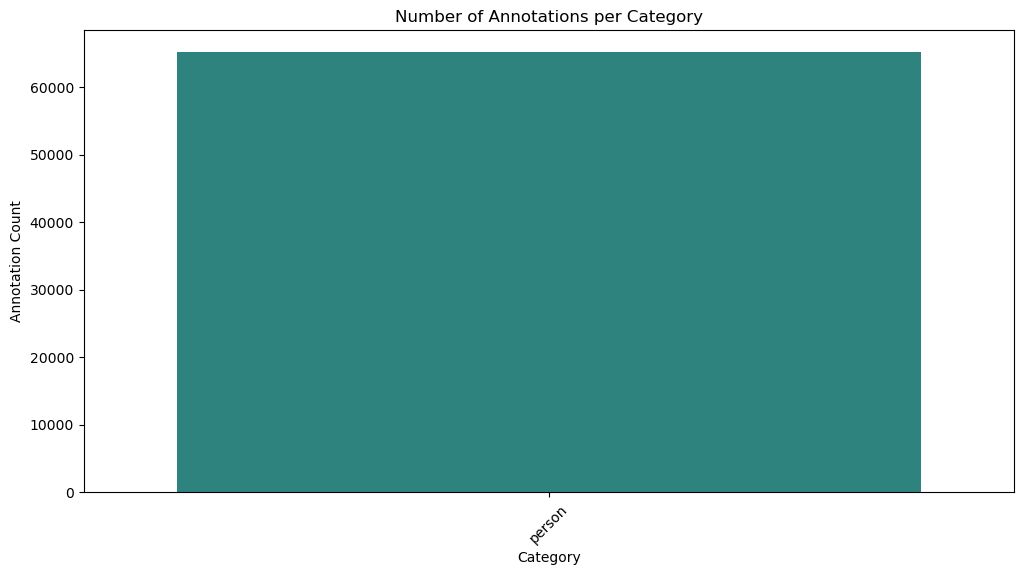

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get category details
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]
category_ids = [cat['id'] for cat in categories]

# Count annotations per category
annotations_per_category = [len(coco.getAnnIds(catIds=cat_id)) for cat_id in category_ids]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_names, y=annotations_per_category, palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Annotations per Category")
plt.xlabel("Category")
plt.ylabel("Annotation Count")
plt.show()


Annotations per Image

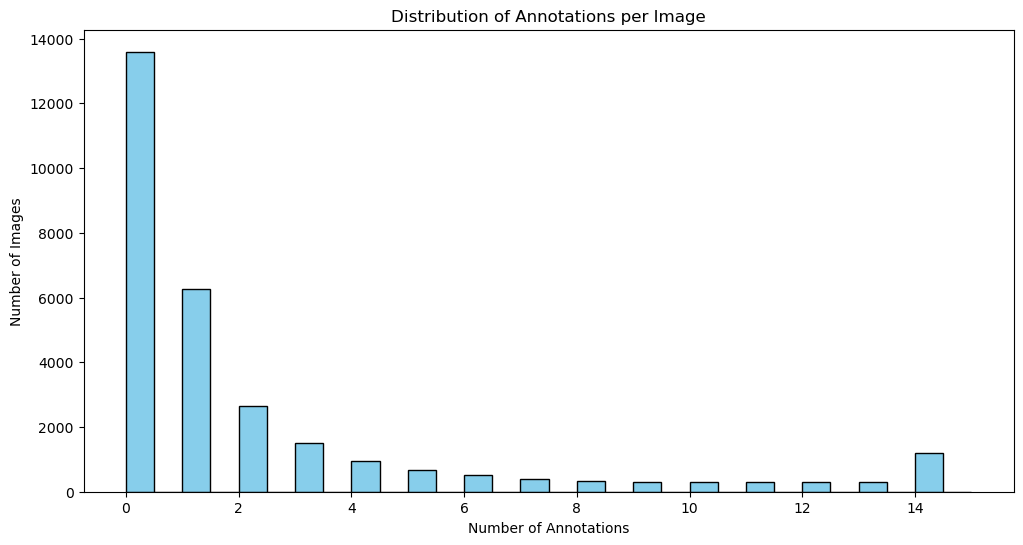

In [14]:
# Get image details
image_ids = coco.getImgIds()
annotations_per_image = [len(coco.getAnnIds(imgIds=img_id)) for img_id in image_ids]

# Plot
plt.figure(figsize=(12, 6))
plt.hist(annotations_per_image, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Annotations per Image")
plt.xlabel("Number of Annotations")
plt.ylabel("Number of Images")
plt.show()


Visualize Sample Images with Annotations

Image Path: C:\Users\sangeetha\Downloads\coco2017_subset\coco2017_subset\train2017\000000522418.jpg
File Name: 000000522418.jpg


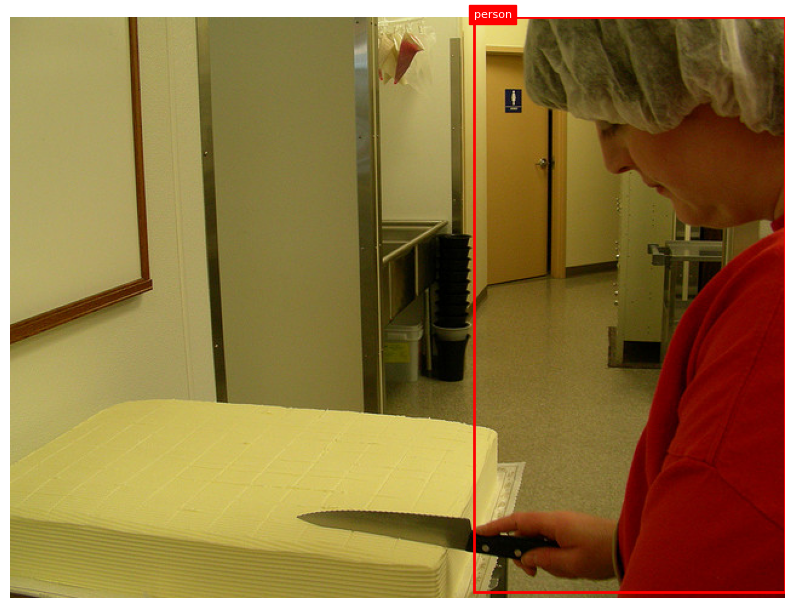

In [15]:
def display_image_with_annotations(image_id):
    # Load image metadata
    img_info = coco.loadImgs(image_id)[0]
    img_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])

    # Debug: Print the image path
    print("Image Path:", img_path)
    print("File Name:", img_info['file_name'])

    # Read the image
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {img_path}")

    # Convert image color
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load annotations
    annotation_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(annotation_ids)

    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')

    # Add bounding boxes
    ax = plt.gca()
    for ann in annotations:
        bbox = ann['bbox']
        x, y, width, height = bbox
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add category name
        cat = coco.loadCats(ann['category_id'])[0]['name']
        plt.text(x, y, cat, color='white', backgroundcolor='red', fontsize=8)

    plt.show()

# Test the function
sample_image_id = image_ids[0]  # Replace with any valid image ID
display_image_with_annotations(sample_image_id)


Displaying image for category: person
Image Path: C:\Users\sangeetha\Downloads\coco2017_subset\coco2017_subset\train2017\000000262146.jpg
File Name: 000000262146.jpg


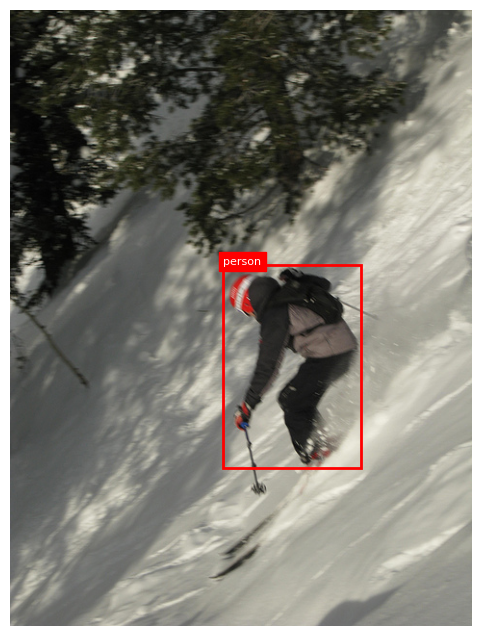

In [16]:
# Display one image from each category
categories = coco.loadCats(coco.getCatIds())  # Load all categories
for category in categories:
    cat_id = category['id']  # Get the category ID
    cat_name = category['name']  # Get the category name
    print(f"Displaying image for category: {cat_name}")

    # Get all image IDs for this category
    image_ids = coco.getImgIds(catIds=cat_id)
    if len(image_ids) > 0:
        sample_image_id = image_ids[0]  # Take the first image for this category
        display_image_with_annotations(sample_image_id)  # Call your existing function
    else:
        print(f"No images found for category: {cat_name}")
